In [33]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import importlib

import sys
import os
core_dir = os.path.join(os.getcwd(), '..', 'daphme')
core_dir = os.path.normpath(core_dir)
sys.path.append(core_dir)

import garden_city as gc
from garden_city import Building, Street, City, Agent, Population
import mobility_model as mmod
import stop_detection as sd
from constants import DEFAULT_SPEEDS, FAST_SPEEDS, SLOW_SPEEDS, DEFAULT_STILL_PROBS,
from constants import FAST_STILL_PROBS, SLOW_STILL_PROBS, ALLOWED_BUILDINGS

import pdb

# Initialization of city and population

In [28]:
# from shapely.geometry import box

# # Initialize city
# city = City(dimensions=(22, 22))

# # add park
# city.add_building('park', (13, 11), bbox=box(9, 9, 13, 13))

# # add homes
# city.add_building('home', (8, 8), [(7, 7), (7, 8)])
# city.add_building('home', (9, 8), [(8, 7), (9, 7)])
# city.add_building('home', (10, 8), [(10, 7)])
# city.add_building('home', (11, 8), [(11, 7)])
# city.add_building('home', (13, 6), [(13, 7)])
# city.add_building('home', (14, 6), [(14, 7)])
# city.add_building('home', (13, 8), [(14, 8)])
# city.add_building('home', (13, 9), [(14, 9)])
# city.add_building('home', (13, 11), [(14, 11)])
# city.add_building('home', (13, 12), [(14, 12)])
# city.add_building('home', (15, 13), [(14, 13)])
# city.add_building('home', (13, 13), [(13, 14), (14, 14)])
# city.add_building('home', (12, 13), [(12, 14)])
# city.add_building('home', (11, 13), [(11, 14)])
# city.add_building('home', (9, 13), [(9, 14)])
# city.add_building('home', (8, 13), [(8, 14)])
# city.add_building('home', (7, 15), [(7, 14)])
# city.add_building('home', (6, 13), [(7, 13)])
# city.add_building('home', (8, 12), [(7, 12)])
# city.add_building('home', (8, 10), [(7, 10), (7, 9)])

# # add workplaces
# city.add_building('work', (3, 4), [(4, 4), (4, 5)])
# city.add_building('work', (5, 3), [(5, 4), (5, 5)])
# city.add_building('work', (6, 6), bbox=box(6, 4, 8, 6))
# city.add_building('work', (8, 6), bbox=box(8, 4, 10, 6))
# city.add_building('work', (12, 6), bbox=box(11, 5, 14, 6))
# city.add_building('work', (12, 3), bbox=box(11, 4, 14, 5))
# city.add_building('work', (15, 3), bbox=box(14, 4, 17, 6))
# city.add_building('work', (18, 4), bbox=box(17, 4, 18, 6))
# city.add_building('work', (18, 6), bbox=box(16, 6, 18, 8))
# city.add_building('work', (15, 9), bbox=box(16, 8, 17, 10))
# city.add_building('work', (18, 8), bbox=box(17, 8, 18, 10))
# city.add_building('work', (18, 10), bbox=box(16, 10, 18, 12))
# city.add_building('work', (18, 13), bbox=box(16, 13, 18, 15))
# city.add_building('work', (18, 15), bbox=box(16, 15, 18, 16))
# city.add_building('work', (15, 15), bbox=box(15, 16, 18, 17))
# city.add_building('work', (14, 15), [(14, 16)])
# city.add_building('work', (16, 18), bbox=box(16, 17, 18, 18))
# city.add_building('work', (15, 18), bbox=box(14, 17, 16, 18))
# city.add_building('work', (13, 18), bbox=box(12, 16, 14, 18))
# city.add_building('work', (11, 18), bbox=box(10, 17, 12, 18))
# city.add_building('work', (11, 15), bbox=box(10, 16, 12, 17))
# city.add_building('work', (8, 18), bbox=box(7, 16, 9, 18))
# city.add_building('work', (6, 18), bbox=box(5, 17, 7, 18))
# city.add_building('work', (6, 15), bbox=box(5, 16, 7, 17))
# city.add_building('work', (3, 16), [(4, 16), (4, 17)])
# city.add_building('work', (3, 13), bbox=box(4, 13, 6, 16))
# city.add_building('work', (6, 12), bbox=box(4, 12, 6, 13))
# city.add_building('work', (3, 10), [(4, 9), (4, 10)])
# city.add_building('work', (6, 9), [(5, 9), (5, 10)])
# city.add_building('work', (6, 8), [(4, 8), (5, 8)])
# city.add_building('work', (3, 6), bbox=box(4, 6, 6, 8))

# # add retail
# city.add_building('retail', (0, 1), bbox=box(1, 1, 3, 3))
# city.add_building('retail', (3, 0), bbox=box(3, 1, 5, 3))
# city.add_building('retail', (5, 0), [(5, 1)])
# city.add_building('retail', (5, 3), [(5, 2)])
# city.add_building('retail', (6, 0), bbox=box(6, 1, 8, 2))
# city.add_building('retail', (6, 3), bbox=box(6, 2, 8, 3))
# city.add_building('retail', (9, 3), bbox=box(9, 1, 10, 3))
# city.add_building('retail', (12, 3), bbox=box(10, 1, 13, 3))
# city.add_building('retail', (14, 3), bbox=box(13, 1, 15, 3))
# city.add_building('retail', (15, 3), [(15, 2)])
# city.add_building('retail', (16, 3), [(16, 2)])
# city.add_building('retail', (15, 0), [(15, 1)])
# city.add_building('retail', (16, 0), [(16, 1)])
# city.add_building('retail', (17, 3), bbox=box(17, 2, 19, 3))
# city.add_building('retail', (18, 0), bbox=box(17, 1, 19, 2))
# city.add_building('retail', (19, 0), bbox=box(19, 1, 21, 2))
# city.add_building('retail', (18, 3), bbox=box(19, 2, 21, 4))
# city.add_building('retail', (18, 5), bbox=box(19, 4, 21, 6))
# city.add_building('retail', (18, 7), bbox=box(19, 6, 20, 8))
# city.add_building('retail', (21, 7), bbox=box(20, 6, 21, 8))
# city.add_building('retail', (18, 10), bbox=box(19, 9, 21, 11))
# city.add_building('retail', (18, 11), bbox=box(19, 11, 21, 13))
# city.add_building('retail', (18, 13), bbox=box(19, 13, 20, 15))
# city.add_building('retail', (21, 13), bbox=box(20, 13, 21, 15))
# city.add_building('retail', (21, 16), bbox=box(19, 15, 21, 17))
# city.add_building('retail', (21, 18), bbox=box(19, 17, 21, 19))

# city.add_building('retail', (21, 19), bbox=box(19, 19, 21, 20))
# city.add_building('retail', (20, 21), bbox=box(19, 20, 21, 21))
# city.add_building('retail', (17, 18), bbox=box(17, 19, 18, 21))
# city.add_building('retail', (16, 18), bbox=box(16, 19, 17, 21))
# city.add_building('retail', (14, 18), bbox=box(13, 19, 16, 20))
# city.add_building('retail', (15, 21), bbox=box(14, 20, 16, 21))
# city.add_building('retail', (13, 21), bbox=box(12, 20, 14, 21))
# city.add_building('retail', (12, 18), bbox=box(12, 19, 13, 20))
# city.add_building('retail', (11, 18), bbox=box(10, 19, 12, 21))
# city.add_building('retail', (9, 18), bbox=box(8, 19, 10, 20))
# city.add_building('retail', (9, 21), bbox=box(8, 20, 10, 21))
# city.add_building('retail', (6, 21), bbox=box(5, 19, 7, 21))
# city.add_building('retail', (4, 21), bbox=box(3, 20, 5, 21))
# city.add_building('retail', (4, 18), bbox=box(3, 19, 5, 20))
# city.add_building('retail', (2, 18), bbox=box(2, 19, 3, 21))
# city.add_building('retail', (1, 18), bbox=box(1, 19, 2, 21))
# city.add_building('retail', (3, 17), bbox=box(1, 16, 3, 18))
# city.add_building('retail', (3, 15), bbox=box(1, 15, 3, 16))
# city.add_building('retail', (3, 14), bbox=box(1, 14, 3, 15))
# city.add_building('retail', (3, 12), bbox=box(1, 12, 3, 14))
# city.add_building('retail', (3, 11), bbox=box(1, 11, 3, 12))
# city.add_building('retail', (3, 10), bbox=box(1, 10, 3, 11))
# city.add_building('retail', (3, 8), bbox=box(1, 8, 3, 10))
# city.add_building('retail', (3, 7), bbox=box(1, 7, 3, 8))
# city.add_building('retail', (0, 5), bbox=box(1, 4, 2, 7))
# city.add_building('retail', (3, 6), [(2, 6)])
# city.add_building('retail', (3, 5), [(2, 5)])
# city.add_building('retail', (3, 4), [(2, 4)])

# city.get_street_graph()
# city.save('garden-city.pkl')

In [29]:
city = gc.load('garden-city.pkl')
population = Population(city)

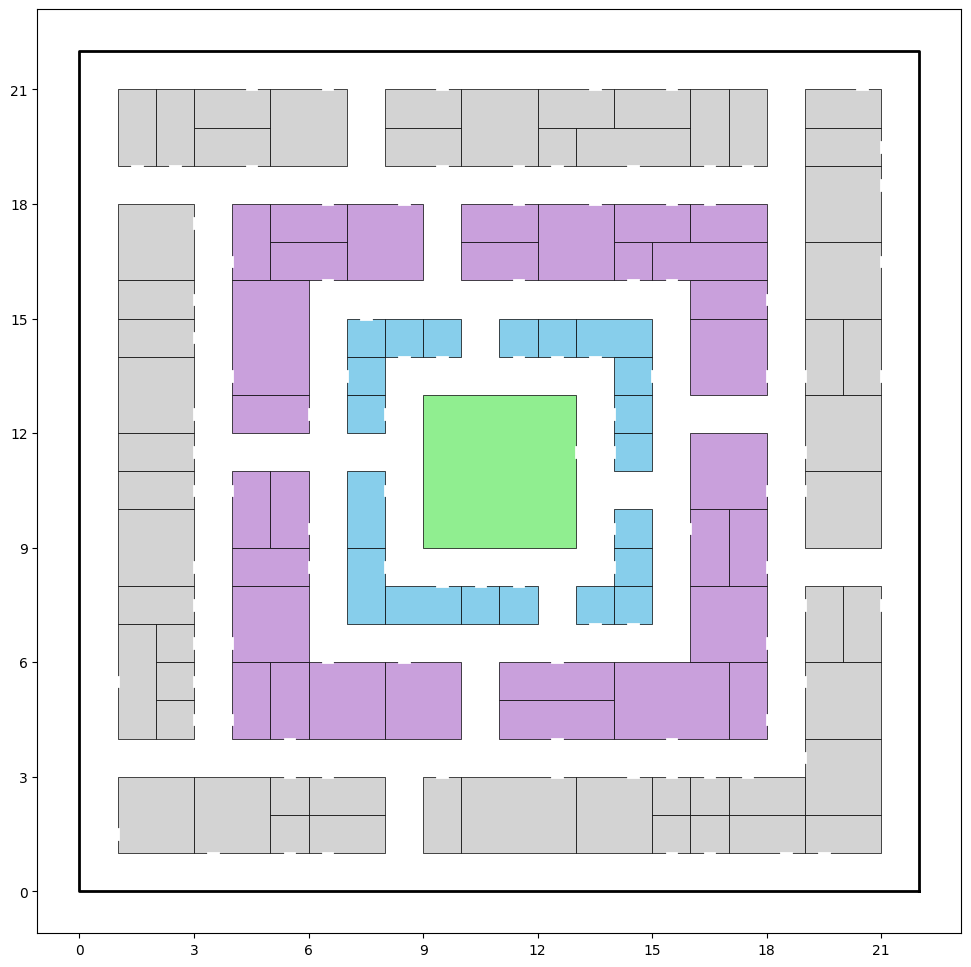

In [30]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 12))
city.plot_city(ax, doors=True, address=True)

In [5]:
# identify a building by its door coordinates and building type
print(city.buildings['r-x12-y3'].blocks)
city.buildings['r-x12-y3'].door_centroid

[(10, 1), (10, 2), (11, 1), (11, 2), (12, 1), (12, 2)]


(12.5, 3.0)

# Trajectory Simulation

In [35]:
start_time = [datetime(2000, 1, 1, hour=0, minute=0) + timedelta(minutes=15*t) for t in range(22)]
unix_timestamp = [int(t.timestamp()) for t in start_time]
duration = [15]*22  # in minutes
location = ['h-x8-y13',
            'h-x8-y13',
            'r-x12-y3',
            'r-x12-y3',
            'r-x12-y3',
            'r-x12-y3',
            'w-x15-y15',
            'w-x15-y15',
            'w-x15-y15',
            'w-x15-y15',
            'w-x15-y15',
            'w-x15-y15',
            'w-x15-y15',
            'w-x15-y15',
            'w-x15-y15',
            'w-x15-y15',
            'w-x15-y15',
            'w-x15-y15',
            'h-x8-y13',
            'h-x8-y13',
            'h-x8-y13',
            'h-x8-y13']

destination = pd.DataFrame({"unix_timestamp":unix_timestamp,
                            "local_timestamp":start_time,
                            "duration":duration,
                            "location":location})
destination = gc.condense_destinations(destination)

Duncan = Agent("Duncan",
               'h-x8-y13',
               'w-x15-y15',
               city,
               destination_diary=destination)

population.add_agent(Duncan)
population.generate_trajectory(Duncan, seed=100)

print(Duncan.diary)
#Duncan.trajectory

Agent identifier already exists in population. Replacing corresponding agent.
Empty DataFrame
Columns: [unix_timestamp, local_timestamp, duration, location]
Index: []


In [39]:
# Auxiliary function that finds allowed buildings
def allowed_buildings(local_ts):
    hour = local_ts.hour
    return ALLOWED_BUILDINGS[hour]

In [ ]:
city.buildings

In [ ]:
def generate_dest_diary(agent):
    probs = pd.DataFrame({
        'id': list(city.buildings.keys()),
        'type': [b.building_type for b in city.buildings.values()],
        'freq': 0,
        'p':0
    }).set_index('id')
    # initializes past counts randomly
    probs.loc[agent.home, 'freq'] = 10
    probs.loc[agent.work, 'freq'] = 10 #could be Poisson?
    
    retail_pref = probs.loc[probs.type=='retail'].index # favorite stores
    work_pref =  # their doctor and accountant
    home_pref = # their neighbors?
    
    # wait, pref. return or gravity explore over allowed buildings
    

1704585600

In [118]:
T_local = datetime(2024, 1, 7, hour=0, minute=0)
T_local.timestamp()

AttributeError: 'float' object has no attribute 'timestamp'

In [42]:
agent = Duncan 

T = datetime(2024, 1, 7, hour=0, minute=0)
if isinstance(T, datetime):
    T = T.timestamp() #convert to unix

T = int(datetime.timestamp(T_local))
T

probs = pd.DataFrame({
    'id': list(city.buildings.keys()),
    'type': [b.building_type for b in city.buildings.values()],
    'freq': 0,
    'p':0
}).set_index('id')
# initializes past counts randomly
probs.loc[agent.home, 'freq'] = 10
probs.loc[agent.workplace, 'freq'] = 10
probs.loc[probs.type=='park', 'freq'] = 3 #agents love to comeback to park

initial_locs = []
initial_locs = list(npr.choice(probs.loc[probs.type=='retail'].index, size=npr.poisson(2)))
initial_locs = list(npr.choice(probs.loc[probs.type=='work'].index, size=npr.poisson(1.5)))
initial_locs = list(npr.choice(probs.loc[probs.type=='home'].index, size=npr.poisson(1.5)))
probs.loc[initial_locs, 'freq'] += 1

# probability of staying in same building
# geometric dist. with p = (1/avg_duration_hrs)/timesteps_in_1_hr
alpha_r, alpha_w, alpha_h = (1/0.5)/4, (1/7)/4, (1/10)/4
# parameters for exploring
rho, gamma = 0.6, 0.2



if agent.destination_diary.empty:
    last_ping = agent.trajectory.iloc[-1]
    start_time_local = last_ping.local_timestamp
    start_time = last_ping.unix_timestamp
    curr = city.get_block((last_ping.x, last_ping.y)) #always a building
else:    
    last_entry = agent.destination_diary.iloc[-1]
    start_time_local = last_entry.local_timestamp + last_entry.duration
    start_time = last_entry.unix_timestamp + last_entry.duration
    curr = last_entry.location
    
while start_time < max_time:






In [99]:
Thomas = Agent("Thomas",
               'h-x8-y8',
               'w-x18-y4',
               city,
               start_time=datetime(2024, 1, 1, hour=0, minute=0))

In [116]:
946757760 < datetime.timestamp(max_time)

True

In [109]:
agent.destination_diary.iloc[-1]

unix_timestamp               946757760
local_timestamp    2000-01-01 20:16:00
duration                           165
location                     h-x11-y13
Name: 17, dtype: object

In [23]:
Thomas = Agent("Thomas",
               'h-x8-y8',
               'w-x18-y4',
               city,
               start_time=datetime(2024, 1, 1, hour=0, minute=0))

population.add_agent(Thomas)
population.generate_trajectory(Thomas, T=4*24*7, seed=110)
Thomas.trajectory

Agent identifier already exists in population. Replacing corresponding agent.


,x,y,local_timestamp,unix_timestamp,identifier
0,8.0,8.5,2024-01-01 00:00:00,1704067200,Thomas
1,8.0,8.5,2024-01-01 00:01:00,1704067260,Thomas
2,8.0,8.5,2024-01-01 00:02:00,1704067320,Thomas
3,8.0,8.5,2024-01-01 00:03:00,1704067380,Thomas
4,8.0,8.5,2024-01-01 00:04:00,1704067440,Thomas
...,...,...,...,...,...
10076,11.5,8.0,2024-01-07 23:56:00,1704671760,Thomas
10077,11.5,8.0,2024-01-07 23:57:00,1704671820,Thomas
10078,11.5,8.0,2024-01-07 23:58:00,1704671880,Thomas
10079,11.5,8.0,2024-01-07 23:59:00,1704671940,Thomas


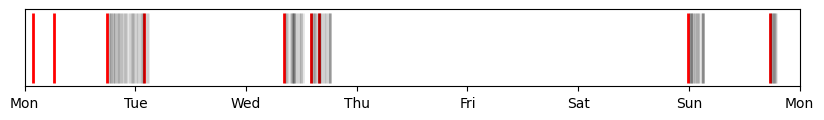

In [24]:
import matplotlib.dates as mdates

Thomas.sample_traj_hier_nhpp(720, 120, 10, seed=130)

fig, ax = plt.subplots(figsize=(10, 1))

first_ping_timestamps = Thomas.sparse_traj[Thomas.sparse_traj['first_ping'] == 1]['local_timestamp']
other_timestamps = Thomas.sparse_traj[Thomas.sparse_traj['first_ping'] == 0]['local_timestamp']

ax.vlines(first_ping_timestamps, 0.95, 1.05, color='red', linewidth=2, alpha=1)
ax.vlines(other_timestamps, 0.95, 1.05, color='black', linewidth=2, alpha=0.10)

#ax.vlines(Thomtraj['local_timestamp'], 0.95, 1.05, color='black', linewidth=2, alpha=0.2)

ax.set_xlim(pd.Timestamp('2024-01-01 00:00'), pd.Timestamp('2024-01-08 00:00'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%a'))
plt.xticks(rotation=0)
ax.yaxis.set_visible(False)

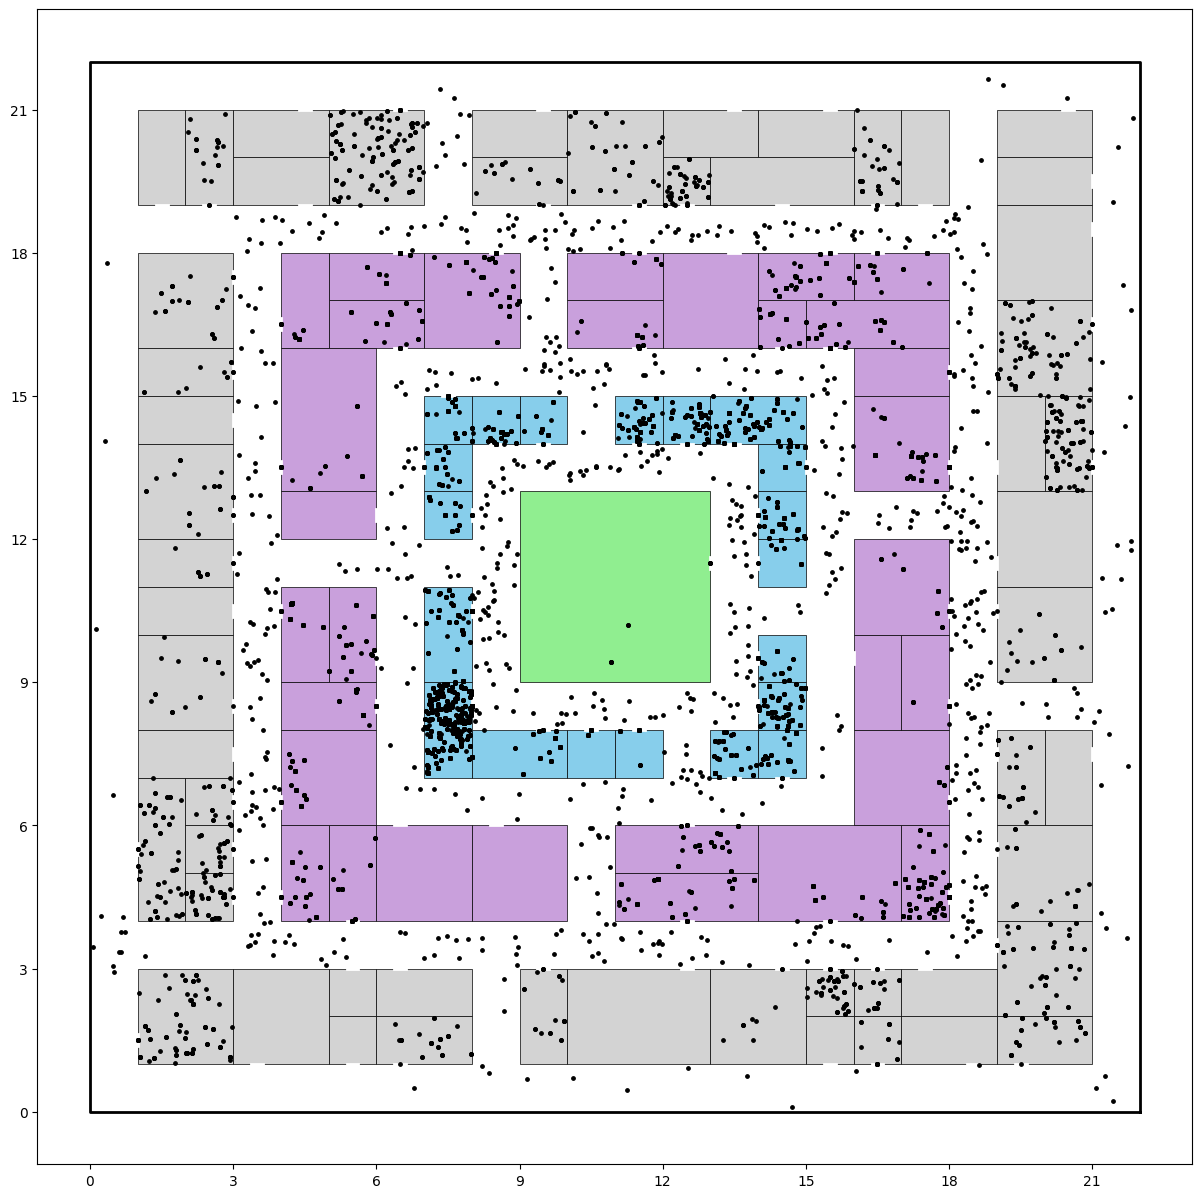

In [25]:
fig, ax = plt.subplots(figsize=(15, 15))
Thomas.plot_traj(ax)

#plt.savefig("garden-city-one-user.png")

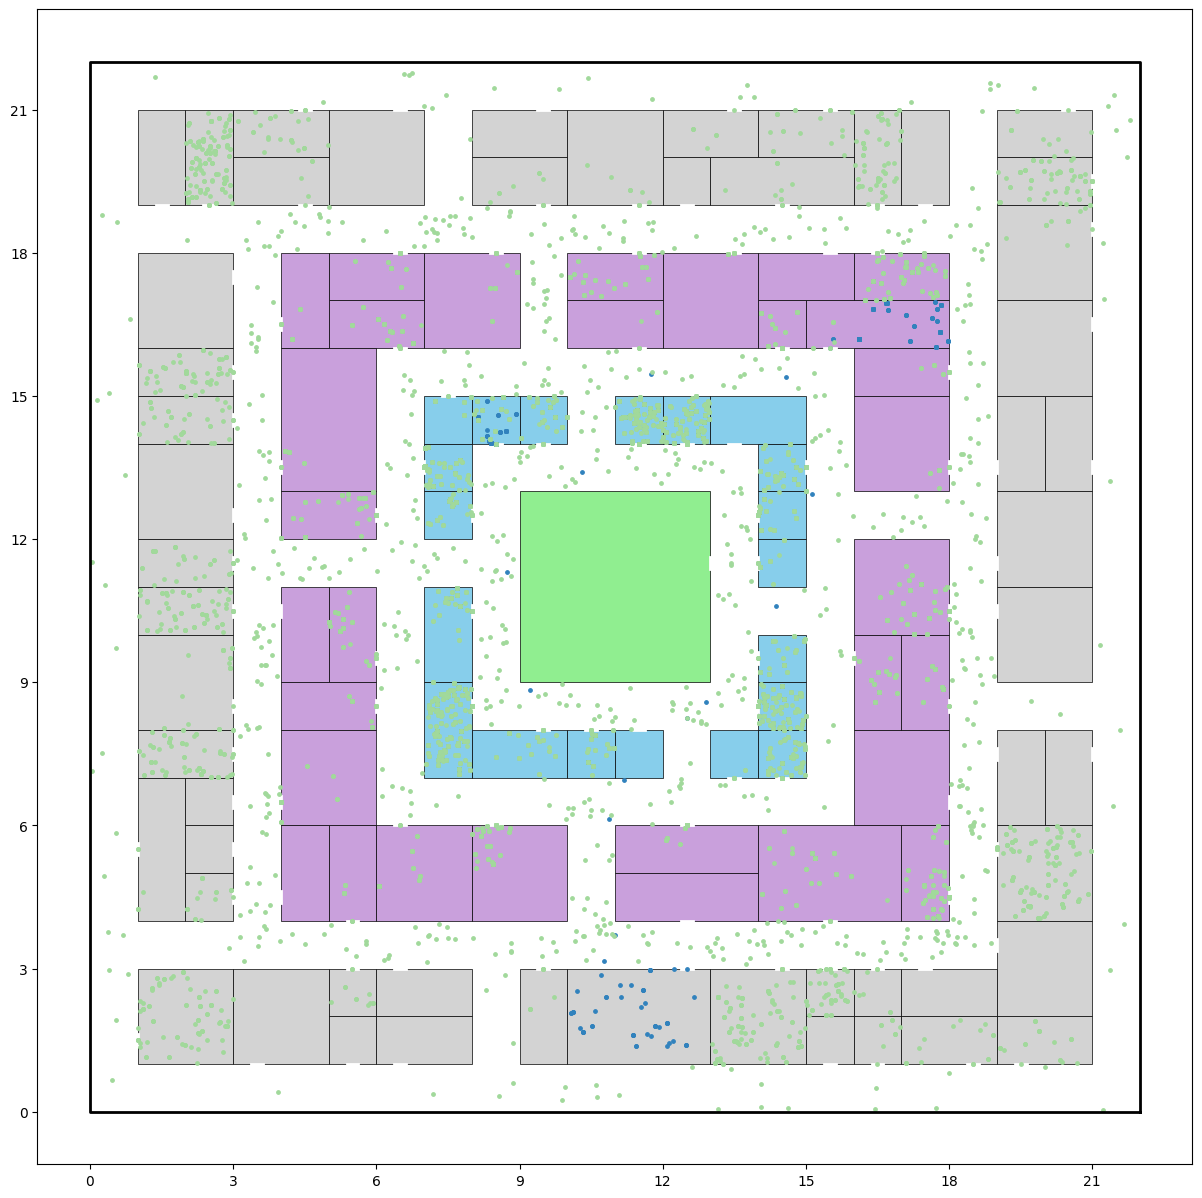

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
population.plot_population(ax)

#plt.savefig("garden-city-two-users.png")

In [12]:
population2 = Population(city)
population2.generate_agents(5, seed=100)

for i, agent_id in enumerate(population2.roster):
    agent = population2.roster[agent_id]
    population.generate_trajectory(agent, T=40, seed=100+i)

In [13]:
population2.roster

{'nifty_saha': <garden_city.Agent at 0x7f491f7e4390>,
 'nostalgic_wing': <garden_city.Agent at 0x7f491f7e4850>,
 'optimistic_brahmagupta': <garden_city.Agent at 0x7f491f7e4e90>,
 'peaceful_gates': <garden_city.Agent at 0x7f491f82b390>,
 'pedantic_kowalevski': <garden_city.Agent at 0x7f491f818510>}

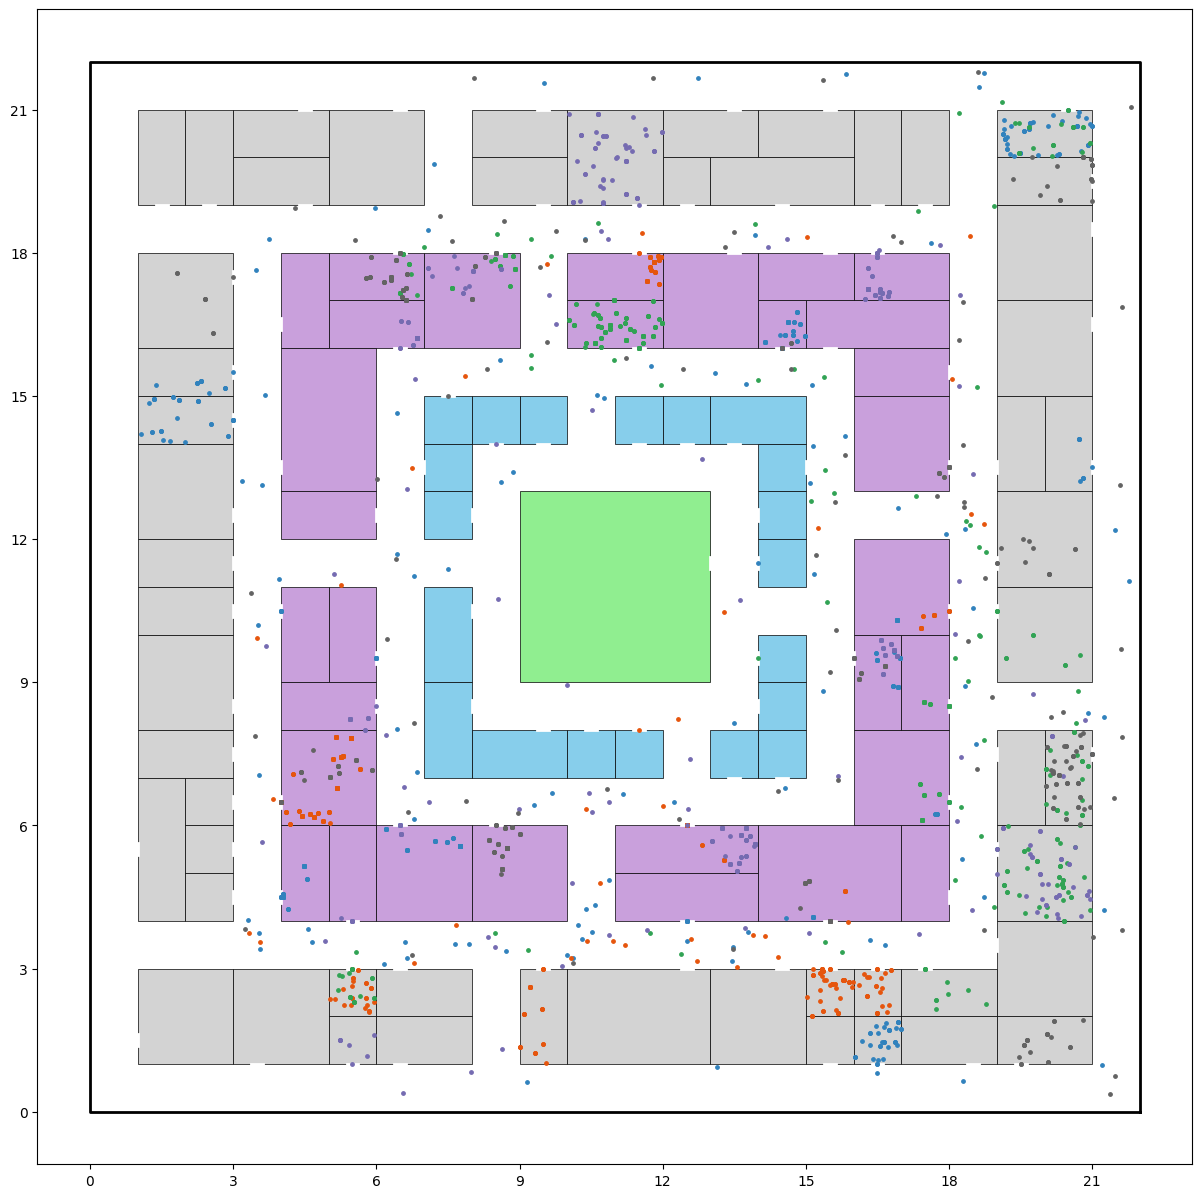

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
population2.plot_population(ax)

# Demonstration: Clustering Algorithms

In [15]:
# user-level stop table:
def generate_stop_table(data, dbscan_df):
    """
    TODO: user id, ts, duration, centroid coord, max time gap, radius, etc.

    Returns
    -------
    TODO
    """
    num_clusters = sum(dbscan_df.cluster.unique() > -1)

    stop_table = []

    total_stop_time = 0

    for cid in range(num_clusters):
        cpings = dbscan_df[dbscan_df.cluster == cid]
        cdata = data.loc[cpings.index]
        duration = int((cdata.index.max() - cdata.index.min()) // 60)
        n = len(cdata)
        x_mean = np.mean(cdata['x'])
        y_mean = np.mean(cdata['y'])
        radius = np.sqrt(np.mean(np.sum((cdata[['x','y']].to_numpy() 
                                         - np.mean(cdata[['x','y']].to_numpy(), axis=0))**2, axis=1)))
        row = [duration, x_mean, y_mean, radius]
        stop_table += row

    return pd.DataFrame(stop_table)


def stop_statistics(data, dbscan_df):
    """
    TODO: user-level metrics: number of clusters, radius of gyration,
    time resolution param? 
    """
    num_clusters = sum(dbscan_df.cluster.unique() > -1)
    total_stop_time = 0

    for cid in range(num_clusters):
        cpings = dbscan_df[dbscan_df.cluster == cid]
        cdata = data.loc[cpings.index]
        duration = int((cdata.index.max() - cdata.index.min()) // 60)
        n = len(cdata)
        x_mean = np.mean(cdata['x'])
        y_mean = np.mean(cdata['y'])
        radius = np.sqrt(np.mean(np.sum((cdata[['x','y']].to_numpy() 
                                         - np.mean(cdata[['x','y']].to_numpy(), axis=0))**2, axis=1)))

        total_stop_time += duration

    return [num_clusters, total_stop_time]

In [16]:
start_time = [datetime(2024, 6, 1, hour=0, minute=0) + timedelta(minutes=60*t) for t in range(5)]
unix_timestamp = [int(t.timestamp()) for t in start_time]
duration = [60]*5  # in minutes

location = ['h-x13-y9'] * 1 + ['h-x13-y11'] * 1 + ['r-x18-y10'] * 3

destination = pd.DataFrame(
    {"unix_timestamp": unix_timestamp, "local_timestamp": start_time,
     "duration": duration, "location": location}
)
destination = gc.condense_destinations(destination)

Angela = Agent("Angela",
               'h-x13-y9',
               'w-x18-y10',
               city,
               destination_diary=destination)

#Angela.destination_diary

population.add_agent(Angela)
population.generate_trajectory(Angela, seed=60, dt=0.25)

Angela.diary

,unix_timestamp,local_timestamp,duration,location
0,1717200000,2024-06-01 00:00:00,61.0,h-x13-y9
1,1717203615.0,2024-06-01 01:00:15,1.0,None
2,1717203675.0,2024-06-01 01:01:15,59.0,h-x13-y11
3,1717207215.0,2024-06-01 02:00:15,3.25,None
4,1717207410.0,2024-06-01 02:03:30,176.75,r-x18-y10


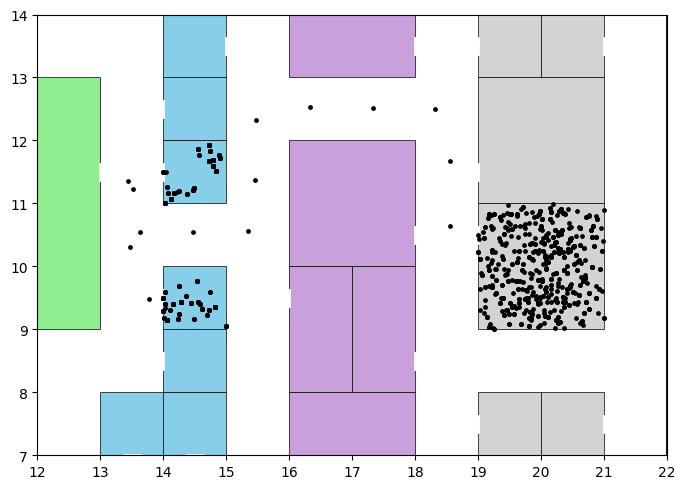

In [17]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.scatter(Angela.trajectory.x, Angela.trajectory.y, s=6, color='black', alpha=1, zorder=2)
city.plot_city(ax, doors=True, address=True, zorder=1)

ax.set_xlim(12, 22)
ax.set_ylim(7, 14)

plt.tight_layout()
plt.show()

#plt.savefig("garden-city-one-user-full.png")

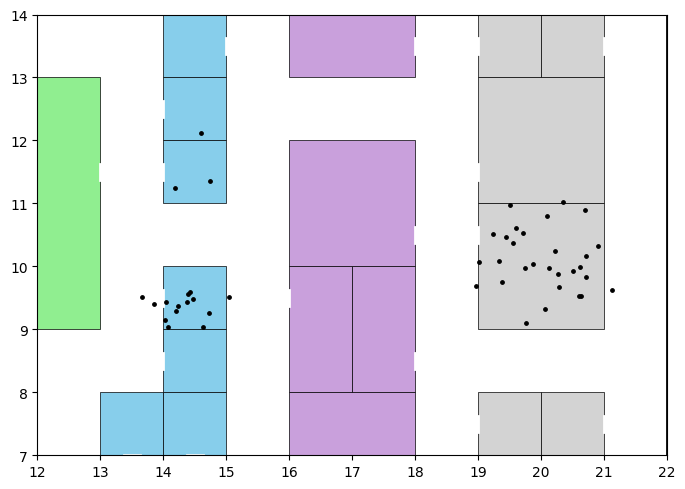

In [18]:
hawkes = [(2, 1/3, 4.6), (9, 1/4, 4.6)]
sparse_traj = mmod.sample_traj(Angela.trajectory, *hawkes[0], nu=5/15, seed=60)

fig, ax = plt.subplots(figsize=(9, 5))
ax.scatter(sparse_traj.x, sparse_traj.y, s=6, color='black', alpha=1, zorder=2)
city.plot_city(ax, doors=True, address=True, zorder=1)

ax.set_xlim(12, 22)
ax.set_ylim(7, 14)

plt.tight_layout()
plt.show()

#plt.savefig("garden-city-one-user-sparse.png")

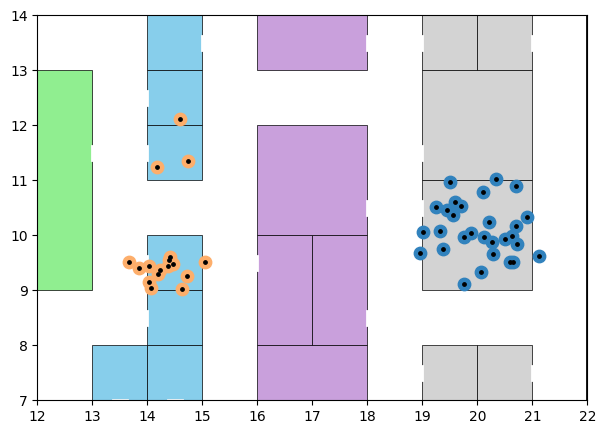

In [19]:
params = [(240, 2, 2), (60, 0.5, 3)]
seed = 60

sparse_traj = sparse_traj.set_index('unix_timestamp', drop=False)
dbscan_out = sd.temporal_dbscan(sparse_traj, *params[0])

#dbscan_out
#generate_stop_table(sparse_traj, dbscan_out)

fig, ax = plt.subplots(figsize=(9, 5))

num_clusters = sum(dbscan_out.cluster.unique() > -1)
for cid in range(num_clusters):
    cpings = dbscan_out[dbscan_out.cluster == cid]
    cdata = sparse_traj.loc[cpings.index]
    col = cm.tab20c(cid/(num_clusters+1))
    ax.scatter(cdata.x, cdata.y, s=80, color=col, alpha=1, zorder=2)

ax.scatter(sparse_traj.x, sparse_traj.y, s=6, color='black', alpha=1, zorder=2)
city.plot_city(ax, doors=True, address=True, zorder=1)

ax.set_xlim(12, 22)
ax.set_ylim(7, 14)

plt.show()

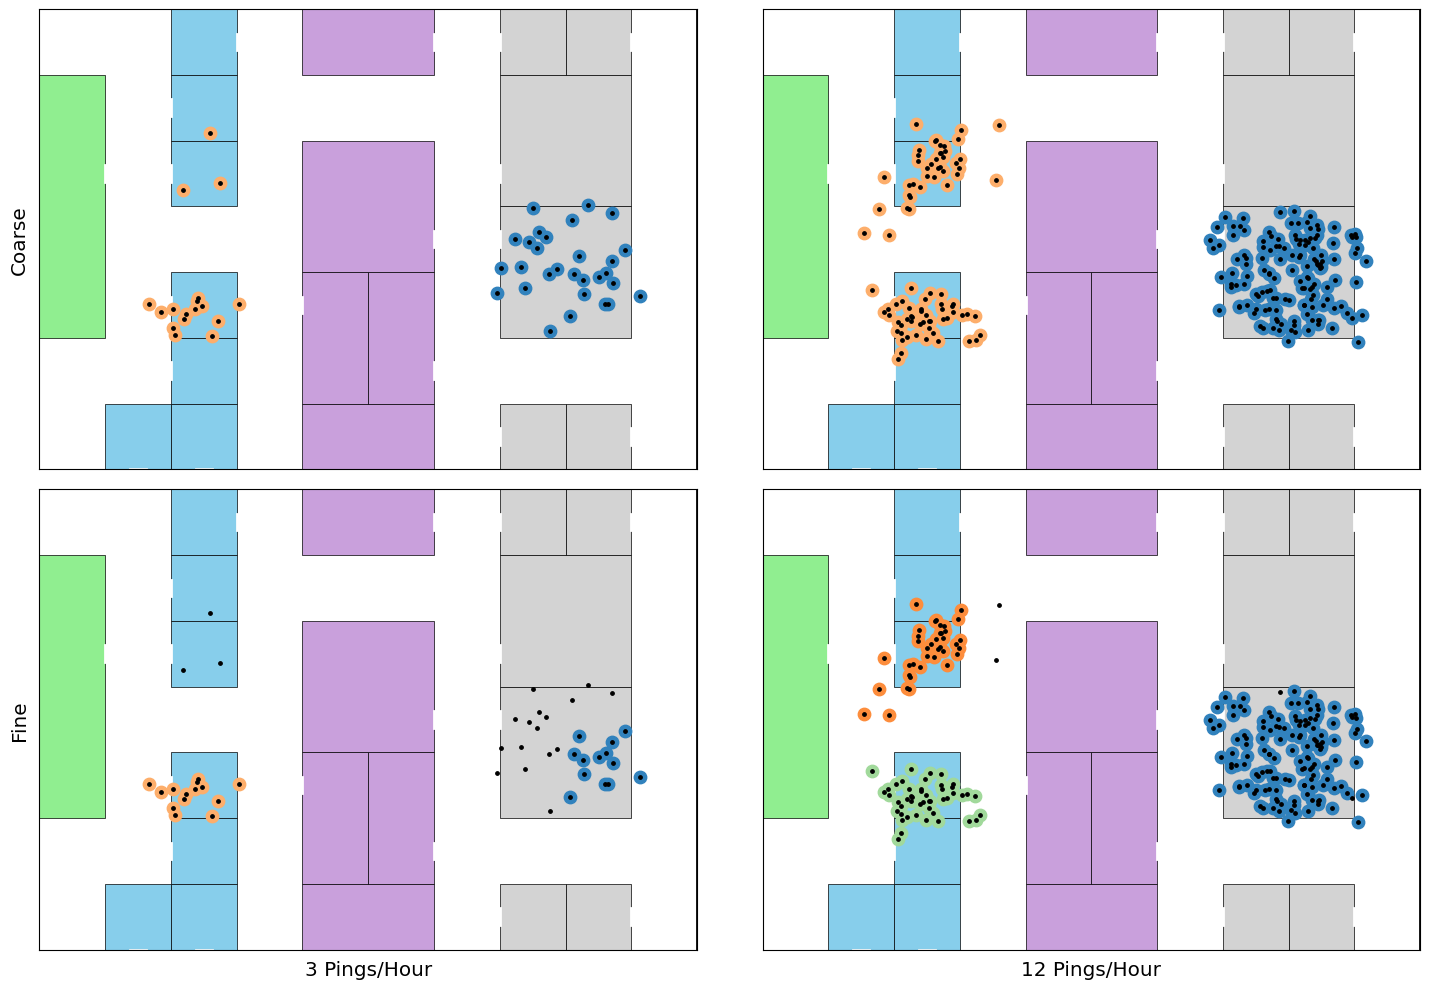

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
params = [(240, 2, 2), (60, 0.5, 3)]
hawkes = [(2, 1/3, 4.6), (9, 1/4, 4.6)]
seed = 60

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        df = mmod.sample_traj(Angela.trajectory, *hawkes[j], nu=5/15, seed=seed)
        df = df.set_index('unix_timestamp', drop=False)

        dbscan_out = sd.temporal_dbscan(df, *params[i])

        num_clusters = sum(dbscan_out.cluster.unique() > -1)
        for cid in range(num_clusters):
            cpings = dbscan_out[dbscan_out.cluster == cid]
            cdata = df.loc[cpings.index]
            col = cm.tab20c(cid/(num_clusters+1))
            ax.scatter(cdata.x, cdata.y, s=80, color=col, alpha=1, zorder=2)

        ax.scatter(df.x, df.y, s=6, color='black', alpha=1, zorder=2)
        city.plot_city(ax, doors=True, address=True, zorder=1)

        ax.set_xlim(12, 22)
        ax.set_ylim(7, 14)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])

axes[0, 0].set_ylabel('Coarse', fontsize='x-large')
axes[1, 0].set_ylabel('Fine', fontsize='x-large')
axes[1, 0].set_xlabel('3 Pings/Hour', fontsize='x-large')
axes[1, 1].set_xlabel('12 Pings/Hour', fontsize='x-large')

plt.tight_layout()
plt.savefig("garden-city-stdbscan.png")
plt.show()

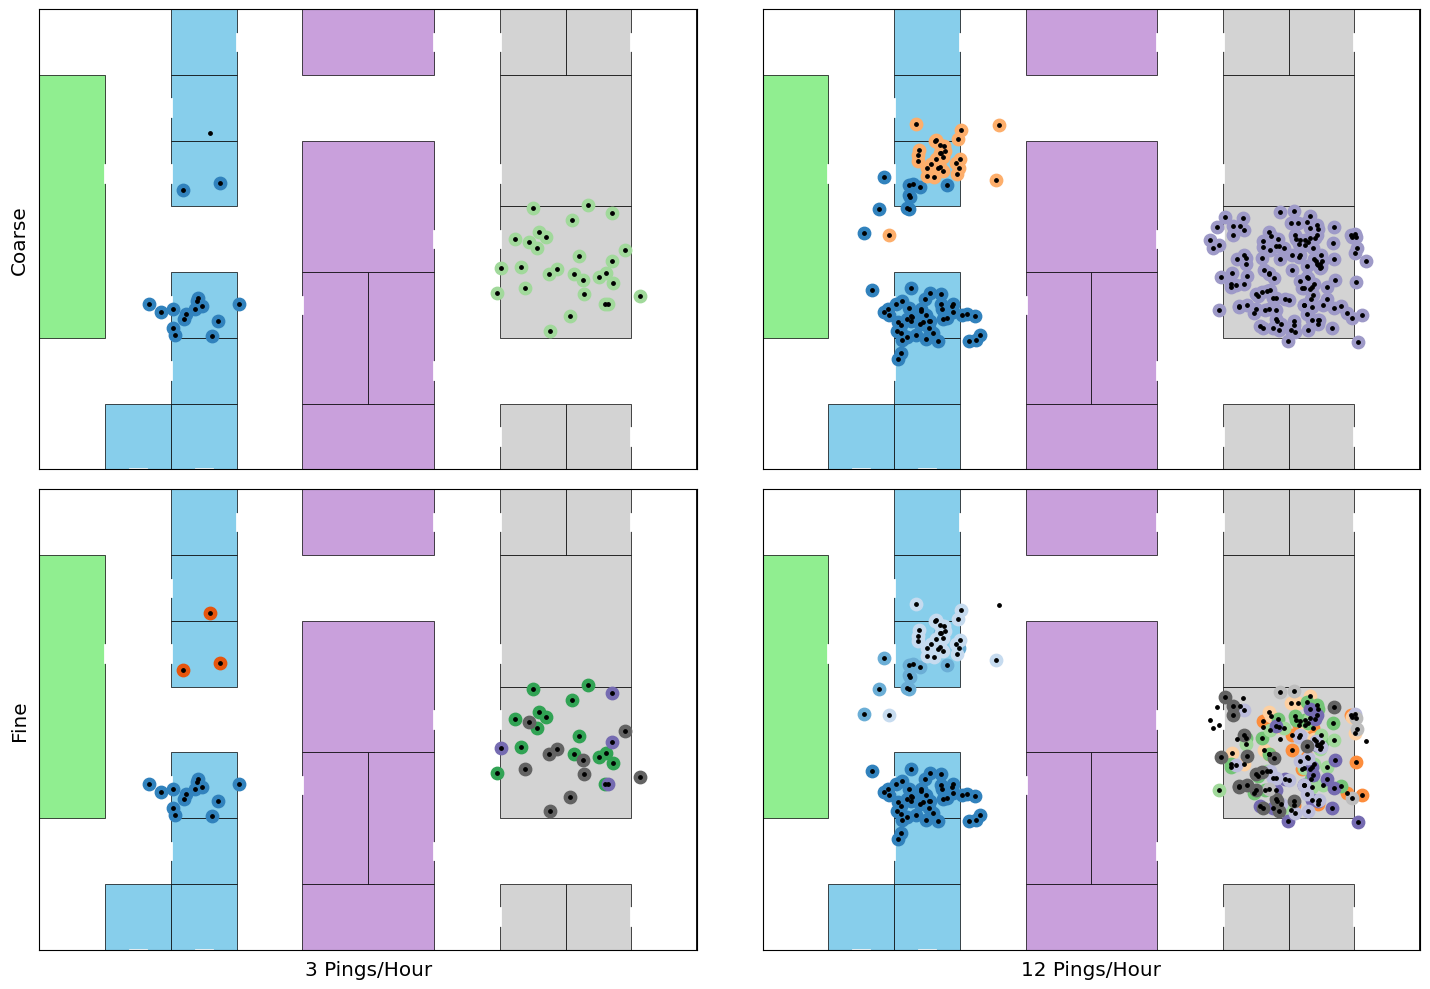

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
params = [(10, 120, 3), (10, 60, 2)]
hawkes = [(2, 1/3, 4.6), (9, 1/4, 4.6)]
seed = 60

for i in range(2):
    for j in range(2):
        ax = axes[i, j]
        df = mmod.sample_traj(Angela.trajectory, *hawkes[j], nu=5/15, seed=seed)
        df = df.set_index('unix_timestamp', drop=False)

        lachesis_out = sd.lachesis_patches(df, *params[i])

        for idx, data in enumerate(lachesis_out):
            col = cm.tab20c(idx/len(lachesis_out))
            ax.scatter(data.x, data.y, s=80, color=col, alpha=1, zorder=2)

        ax.scatter(df.x, df.y, s=6, color='black', alpha=1, zorder=2)
        city.plot_city(ax, doors=True, address=True, zorder=1)

        ax.set_xlim(12, 22)
        ax.set_ylim(7, 14)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])

axes[0, 0].set_ylabel('Coarse', fontsize='x-large')
axes[1, 0].set_ylabel('Fine', fontsize='x-large')
axes[1, 0].set_xlabel('3 Pings/Hour', fontsize='x-large')
axes[1, 1].set_xlabel('12 Pings/Hour', fontsize='x-large')

plt.tight_layout()
plt.savefig("garden-city-lachesis.png")
plt.show()

Animation of pre-sampled trajectory for one users

In [22]:
# from matplotlib.animation import FuncAnimation, PillowWriter

# fig, ax = plt.subplots(figsize=(15, 15))

# city.plot_city(ax, doors=True, address=True, zorder=1)

# line, = ax.plot([], [], color='blue', alpha=0.1)
# scatter = ax.scatter([], [], s=8, color='black', alpha=0.5)
# time_text = ax.text(0.5, 0.975, '', transform=ax.transAxes)

# fade_length = 60  # Adjust this to control the length of the fade

# def update(i):
#     if i < fade_length:
#         current_fade_length = i + 1
#     else:
#         current_fade_length = fade_length
#     alphas = np.array([np.exp(-0.5*x) for x in range(current_fade_length)][::-1])

#     line.set_data(Angela.trajectory['x'][:i], Angela.trajectory['y'][:i])
#     scatter.set_offsets(Angela.trajectory[['x', 'y']][:i])
#     scatter.set_alpha(np.pad(alphas, (i + 1 - current_fade_length, 0), 'constant'))
#     time_text.set_text(Angela.trajectory['local_timestamp'][i].strftime('%Y-%m-%d %H:%M:%S'))
#     return line, scatter

# anim = FuncAnimation(fig, update, frames=len(Angela.trajectory), interval=50, blit=True)
# anim.save('garden-city-traj-animation.gif', writer=PillowWriter(fps=20))
# plt.close(fig)